# Introduction to the high accuracy positioning with open PPP/PPP-RTK services

## Introduction to CSSRlib

*CSSRLIB* is a open toolkit in Python for high accuracy GNSS positioning. It supports SSR (State-Space Representation) based potitioning such as PPP (Precise Point Positioning) or PPP-RTK (Realtime Kinematic), and also supports RTK. The goal of the CSSRlib toolkit is to provide an easy-to-understand open implementation to learn PPP/PPP-RTK positioning provided by satellite-based open PPP/PPP-RTK services such as QZSS CLAS, Galileo HAS, and BeiDou 3 PPP. It also supports ground based open service by IGS. The code is based on RTKlib.

It supports the following open format:

- The observation data and the ephemeis in RINEX
- The PPP/PPP-RTK correction data in RTCM SSR, IGS SSR, Compact SSR, ...
- The precise orbit/clock data in SP3 format.


## Installation

You can install CSSRlib using pip or clone the repo from Github.



In [5]:
# %pip install cssrlib   # install released version

# load most recent code to local folder for easier visibility
#!rm -rf cssrlib
!git clone https://github.com/hirokawa/cssrlib.git
!mv cssrlib/src/cssrlib/*.* cssrlib

Cloning into 'cssrlib'...
'mv' �́A�����R�}���h�܂��͊O���R�}���h�A
����\�ȃv���O�����܂��̓o�b�` �t�@�C���Ƃ��ĔF������Ă��܂���B


Additional python packages are required as prerequisites and can be installed via the following commands.  Note that the cartopy package is not available in Windows but is used only for plotting the results.

In [6]:
# %pip install notebook numpy matplotlib  # Already installed in Colab but may be needed if running locally

%pip install bitstruct galois
%pip install cartopy                      # Comment this line out if running in Windows
%pip install pysolid                      # Comment this line out if running in Windows

  Using cached numba-0.61.2-cp313-cp313-win_amd64.whl.metadata (2.8 kB)
  Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl.metadata (5.0 kB)
Using cached numba-0.61.2-cp313-cp313-win_amd64.whl (2.8 MB)
Using cached llvmlite-0.44.0-cp313-cp313-win_amd64.whl (30.3 MB)

  Attempting uninstall: llvmlite

    Found existing installation: llvmlite 0.45.1

    Uninstalling llvmlite-0.45.1:

      Successfully uninstalled llvmlite-0.45.1

   ---------------------------------------- 0/2 [llvmlite]
   ---------------------------------------- 0/2 [llvmlite]
   ---------------------------------------- 0/2 [llvmlite]
   ---------------------------------------- 0/2 [llvmlite]
  Attempting uninstall: numba
   ---------------------------------------- 0/2 [llvmlite]
    Found existing installation: numba 0.62.1
   ---------------------------------------- 0/2 [llvmlite]
   -------------------- ------------------- 1/2 [numba]
    Uninstalling numba-0.62.1:
   -------------------- ------------------

ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


Note: you may need to restart the kernel to use updated packages.


ERROR: Invalid requirement: '#': Expected package name at the start of dependency specifier
    #
    ^


## Structure of CSSRlib


CSSRlib consits of multiple python files/modules as follows:

- Contructor (`__init__`): initialize the variables used in CSSRlib.
- `gnss`: Common subroutines and classes used in CSSRlib.
- `ephemeris`: calculate the position of satellite using ephemeris.
- `peph`: calculate the position of satellite using precise ephemeris in SP3 format．
- `tlesim`: calculate the position of satellite using TLE.
- `plot`: subroutines to visualize.

- `rinex`: parse RINEX obs/nav file.
- `cssrlib`: parse PPP/PPP-RTK correction messages in Compact SSR (CSSR) format.
- `cssr_has`: parse PPP correction messages for Galileo HAS format.
- `cssr_bds`: parse PPP correction messages for BeiDou PPP format.
- `cssr_pvs`: parse PPP correction messages for PPP via SouthPAN (PVS) format (experimental).
- `rtcm`: parse RTCM 3 messsages.
- `ppp`: functions for PPP positioning
- `pppssr`: PPP/PPP-AR positioning
- `ppprtk`: PPP-RTK positioning
- `pntpos`: standalone positioning
- `rtk`: RTK positioning
- `rawnav`: decoder for raw navigation message
- `mlambda`: Ambiguity resolution using modified LAMBDA method
- `sbas`: SBAS (L1/L5) message decoder


## Load Sample Data and Test Scripts from Github

Sample data and test scripts are provided in a separate Github respository

In [1]:
!git clone https://github.com/hirokawa/cssrlib-data.git

fatal: destination path 'cssrlib-data' already exists and is not an empty directory.


Download IGS related files.

In [43]:
!cd cssrlib-data/samples && python igs_download.py

Found 32 files to download.
Connected to gdc.cddis.eosdis.nasa.gov as anonymous (Binary Mode)
FTP session closed.



igs20.atx:   0%|          | 0.00/51.0M [00:00<?, ?B/s]
igs20.atx:   0%|          | 8.19k/51.0M [00:00<17:16, 49.2kB/s]
igs20.atx:   0%|          | 39.9k/51.0M [00:00<06:36, 129kB/s] 
igs20.atx:   0%|          | 96.3k/51.0M [00:00<03:53, 218kB/s]
igs20.atx:   0%|          | 208k/51.0M [00:00<02:11, 387kB/s] 
igs20.atx:   1%|          | 432k/51.0M [00:00<01:10, 714kB/s]
igs20.atx:   2%|▏         | 881k/51.0M [00:01<00:37, 1.35MB/s]
igs20.atx:   3%|▎         | 1.78M/51.0M [00:01<00:18, 2.61MB/s]
igs20.atx:   6%|▌         | 2.97M/51.0M [00:01<00:10, 4.57MB/s]
igs20.atx:   7%|▋         | 3.52M/51.0M [00:01<00:09, 4.77MB/s]
igs20.atx:   9%|▉         | 4.70M/51.0M [00:01<00:07, 6.50MB/s]
igs20.atx:  11%|█         | 5.44M/51.0M [00:01<00:06, 6.56MB/s]
igs20.atx:  12%|█▏        | 6.28M/51.0M [00:01<00:06, 6.88MB/s]
igs20.atx:  15%|█▍        | 7.40M/51.0M [00:01<00:05, 8.05MB/s]
igs20.atx:  16%|█▌        | 8.25M/51.0M [00:01<00:05, 8.08MB/s]
igs20.atx:  18%|█▊        | 9.43M/51.0M [00:02<00:04,


## Examples

This tutorial provides examples to show the basic features of CSSRlib for Standalone, RTK, PPP-RTK, and PPP positioning using correction data from open PPP/PPP-RTK services. The following examples are included:

- Visualizing orbit of QZSS satellite
- Showing skyplot
- Standalone positioning
- RTK positioning
- PPP-RTK positioning (QZSS-CLAS)
- PPP positioning (BeiDou)
- PPP positioning (Galileo HAS)
- PPP positioning (IGS)
- PPP positioning (MADOCA-PPP)
- PPP positioning (PPP via SouthPAN)
- PPP positioning (JPL GDGPS via RTCM)

Note that despite the static setup
of the antenna, all data sets are processed assuming a non-stationary antenna. A motion model has not been used for the
receiver position. Instead, a sufficiently large amount of process noise has been added to the variance of the predicted position
states.

Click on the arrows in the left margin to open or close an example

## Example 1: Visualizing the Orbit of a Satellite

In this first example, we will introduce the basic features of CSSRlib to calculate and visualize a QZSS satellite orbit.

First, we will load the required Python modules such as numpy, matplotlib,  and cartopy. Then we will load modules from CSSRlib.

In [7]:
import matplotlib.pyplot as plt
import cartopy.crs as ccrs
import numpy as np

from cssrlib.rinex import rnxdec
from cssrlib.gnss import Nav, epoch2time, prn2sat, uGNSS, sat2prn,\
    timeadd, ecef2pos
from cssrlib.ephemeris import findeph, eph2pos

In CSSRlib, the epoch is defined as Python Class `gtime_t` as in RTKlib. The snippet defines epoch "19/3/2021 0:00:00", shows the internal variable of `gtime_t`.

In [8]:
t0 = epoch2time([2021, 3, 19, 0, 0, 0]) # year, month, day, hour, minute, sec
t0.time,t0.sec

(1616112000, 0)

Then, the ephemeris in RINEX format is loaded using RINEX decoder in CSSRlib.

In [30]:
dec = rnxdec()
nav = dec.decode_nav( 'cssrlib-data/data/doy2021-078/30340780.21q', Nav()) # load RINEX navigation file

The satellites are identified by the system (GPS, Galileo, QZS, ...) and by PRN number. They should be converted into the internal satellite numbers using prn2sat. This snippet shows the satellite number for QZSS with PRN 194 (QZS-2):

In [11]:
sat = prn2sat(uGNSS.QZS, 194)
sat

70

The orbit position of a GNSS satellite can be calculated using ephemeris defined in the RINEX navigation file. The valid ephemeris for a specific epoch can be searched for using `findeph`. Position and velocity in ECEF and clock bias are calculated by eph2pos. The position in geodetic cordinates can be calculated by ecef2pos:

In [12]:
t = t0
eph = findeph(nav.eph, t, sat)
rs, vs, dts = eph2pos(t, eph, True)
print('rs=',rs, 'vs=', vs,'dts=', dts)
pos = ecef2pos(rs)
print('pos=',pos)

rs= [-27695465.67390223  25576355.5431149   23733383.2869802 ] vs= [ 618.82498925 -271.15881898 1281.49729409] dts= 3.4869334074196084e-06
pos= [5.62300943e-01 2.39595272e+00 3.81752334e+07]


The orbit of QZS-2 for 1 day (24 hours) is calculated and plotted using Cartopy:

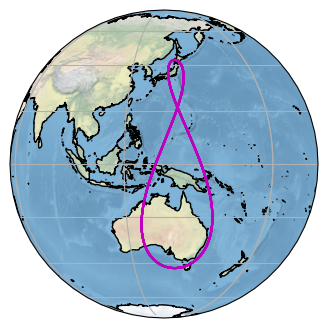

In [13]:
lon0 = 135
plt.figure(figsize=(4, 4))
ax = plt.axes(projection=ccrs.Orthographic(central_longitude=lon0,
                                           central_latitude=0))
ax.coastlines(resolution='50m')
ax.gridlines()
ax.stock_img()

n = 24*3600//300
pos = np.zeros((n, 3))
r2d = 180/np.pi

for k in range(uGNSS.MAXSAT):
    sat = k+1
    sys, prn = sat2prn(sat)
    if sys != uGNSS.QZS:  # skip non QZSS
        continue
    for i in range(n):
        t = timeadd(t0, i*300)
        if eph is None:
            continue
        rs, dts = eph2pos(t, eph)
        pos[i, :] = ecef2pos(rs)

    plt.plot(pos[:, 1]*r2d, pos[:, 0]*r2d, 'm-', transform=ccrs.Geodetic())
plt.show()

## Example 2: Showing a Skyplot

For the visualization of measurements, CSSRlib supports the skyplots of satellite orbit paths at specific locations. At first, the required modules are loaded.

In [14]:
import numpy as np
from cssrlib.gnss import Nav, ecef2pos, geodist, satazel, timediff, uGNSS, rSigRnx
from cssrlib.ephemeris import findeph, eph2pos
from cssrlib.plot import skyplot, plot_elv
from cssrlib.rinex import rnxdec

Then, an instance of a RINEX decoder is generated. In this example, the observation and navigation files measured by a Septentrio Mosaic-X5 receiver are used. We also need to specify which satellite signals will be used.

In [15]:
navfile = 'cssrlib-data/data/doy2021-078/SEPT078M.21P'
obsfile = 'cssrlib-data/data/doy2021-078/SEPT078M.21O'

dec = rnxdec()
nav = dec.decode_nav(navfile,Nav())

sigs = [rSigRnx("GC1C"), rSigRnx("EC1C"), rSigRnx("JC1C")]
dec.setSignals(sigs)

Next, the orbit of tracked satellites is calculated for 15 minutes of epoch.

In [16]:
nep = 15*60  # 15 minutes
elv = np.ones((nep, uGNSS.MAXSAT))*np.nan
azm = np.ones((nep, uGNSS.MAXSAT))*np.nan
t = np.zeros(nep)*np.nan

if dec.decode_obsh(obsfile) >= 0:
    rr = dec.pos
    pos = ecef2pos(rr)
    for ne in range(nep):
        print('\repoch=%d/%d' % (ne, nep), end='')
        obs = dec.decode_obs()
        if ne == 0:
            t0 = obs.t
        t[ne] = timediff(obs.t, t0)
        for k, sat in enumerate(obs.sat):
            eph = findeph(nav.eph, obs.t, sat)
            if eph is None:
                continue
            rs, dts = eph2pos(obs.t, eph)
            r, e = geodist(rs, rr)
            azm[ne, sat-1], elv[ne, sat-1] = satazel(pos, e)
    dec.fobs.close()

epoch=899/900

The elevation and azimuth angles of each satellite are recorded, and the skyplot is generated as below:

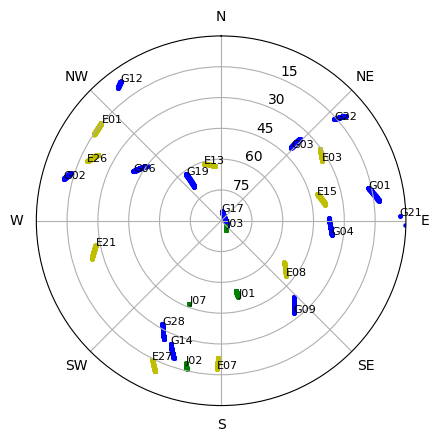

In [17]:
#plot_elv(t, elv)
nsat = skyplot(azm, elv)

## Example 3: Standalone positioning

This section introduces standalone GNSS positioning using RINEX observations from a Septentrio Mosaic-X5 receiver.

First, the required Python modules are loaded.

In [18]:
import matplotlib.pyplot as plt
import numpy as np
from cssrlib.rinex import rnxdec
from cssrlib.gnss import ecef2pos, timediff, dops, ecef2enu, rSigRnx, Nav
from cssrlib.pntpos import stdpos

Then the rover position is defined for reference.

In [19]:
xyz_ref = [-3962108.6726, 3381309.4719, 3668678.6264]
pos_ref = ecef2pos(xyz_ref)

RINEX navigation and observation files are defined, an instance of RINEX decoder is generated, and satellite signals are specified.

In [20]:
navfile = 'cssrlib-data/data/doy2023-223/NAV223.23p'
obsfile = 'cssrlib-data/data/doy2023-223/SEPT223Y.23O'  # PolaRX5
dec = rnxdec()
nav = dec.decode_nav(navfile, Nav(nf=1))
nav.pmode = 0

sigs = [rSigRnx("GC1C"), rSigRnx("EC1C"), rSigRnx("JC1C"),
        rSigRnx("GL1C"), rSigRnx("EL1C"), rSigRnx("JL1C"),
        rSigRnx("GS1C"), rSigRnx("ES1C"), rSigRnx("JS1C")]
dec.setSignals(sigs)
dec.autoSubstituteSignals()

The variables for position, DOPs, and number of satellite are defined for 6 minutes epoch.

In [21]:
nep = 6*60  # 6 minutes
t = np.zeros(nep)
enu = np.zeros((nep, 3))
dop = np.zeros((nep, 4))
nsat = np.zeros(nep, dtype=int)

std = stdpos(nav, dec.pos, 'test_stdpos.log')
sol = np.zeros((nep, nav.nx))

The standalone GNSS positioning by `std.process()` is conducted for 6 minutes.

In [22]:
if dec.decode_obsh(obsfile) >= 0:
    nav.x[0:3] = dec.pos
    for ne in range(nep):
        print('\repoch=%d/%d' % (ne, nep), end='')
        obs = dec.decode_obs()
        if ne == 0:
            t0 = nav.t = obs.t
        t[ne] = timediff(obs.t, t0)
        # nav, az, el = pntpos(obs, nav)
        std.process(obs, cs=None)
        sol[ne, :] = nav.x
        dop[ne, :] = std.dop
        enu[ne, :] = ecef2enu(pos_ref, sol[ne, 0:3]-xyz_ref)
        #nsat[ne] = len(el)
    dec.fobs.close()

epoch=359/360

The ENU position relative to the reference position is plotted.

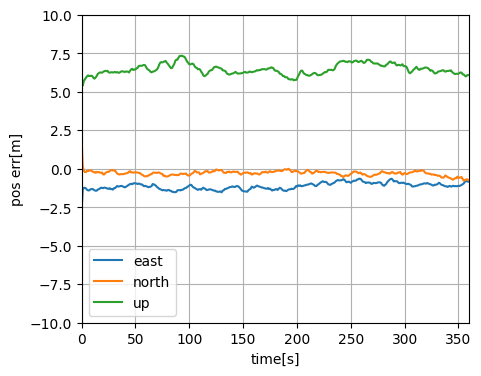

In [23]:
def plt_enu(t, enu, dmax=0.4):
    plt.figure(figsize=(5,4))
    plt.plot(t, enu)
    plt.ylabel('pos err[m]')
    plt.xlabel('time[s]')
    plt.legend(['east', 'north', 'up'])
    plt.grid()
    plt.axis([0, nep, -dmax, dmax])
    plt.show()

plt_enu(t, enu, 10)

To measure the geometry for positioning, DOPs (PDOP, HDOP, VDOP) are plotted:

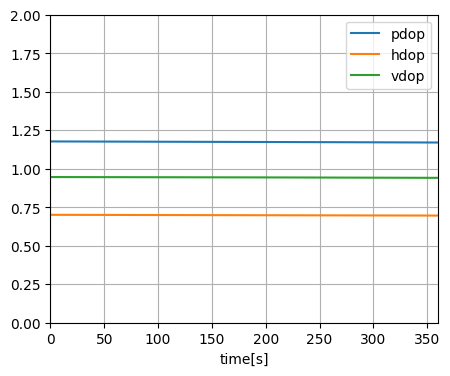

In [24]:
def plt_dop(t, dop):
    nep = len(t)
    plt.figure(figsize=(5,4))
    plt.plot(t, dop)
    plt.legend(['pdop', 'hdop', 'vdop'])
    plt.grid()
    plt.axis([0, nep, 0, 2])
    plt.xlabel('time[s]')
    plt.show()

plt_dop(t,dop[:,1:])

## Example 4: RTK positioning

This section demonstrates static RTK positioning under open-sky conditions using a Septentrio Mosaic-X5 rover and a Trimble Net-R9 base. The results are obtained using dual-frequency pseudorange and carrier-phase observations of GPS, Galileo and QZSS.  

First, load the required Python modules.

In [2]:
import matplotlib.pyplot as plt
import numpy as np
import sys

import cssrlib.rinex as rn
import cssrlib.gnss as gn
from cssrlib.gnss import rSigRnx, time2str
from cssrlib.peph import atxdec, searchpcv
from cssrlib.rtk import rtkpos

Define the reference position of the rover for evaulation.

In [5]:
xyz_ref = [-3962108.6836, 3381309.5672, 3668678.6720]
pos_ref = gn.ecef2pos(xyz_ref)

Specify the satellite signals to be processed for base and rover. We choose L1C/A, L2P(Y) for GPS, E1, E5a for Galileo, L1C/A, L2C(L) for QZSS.

In [4]:
sigs = [rSigRnx("GC1C"), rSigRnx("GC2W"),
        rSigRnx("EC1C"), rSigRnx("EC5Q"),
        rSigRnx("JC1C"), rSigRnx("JC2L"),
        rSigRnx("GL1C"), rSigRnx("GL2W"),
        rSigRnx("EL1C"), rSigRnx("EL5Q"),
        rSigRnx("JL1C"), rSigRnx("JL2L"),
        rSigRnx("GS1C"), rSigRnx("GS2W"),
        rSigRnx("ES1C"), rSigRnx("ES5Q"),
        rSigRnx("JS1C"), rSigRnx("JS2L")]

Load the measurement and ephemeris data for the rover (Septentrio Mosaic-X5).

In [6]:
bdir = 'cssrlib-data/data/doy2025-233/'
navfile = bdir+'233h_rnx.nav'
obsfile = bdir+'233h_rnx.obs'

# rover
dec = rn.rnxdec()
dec.setSignals(sigs)
nav = gn.Nav()
dec.decode_nav(navfile, nav)
dec.decode_obsh(obsfile)
dec.autoSubstituteSignals()

For RTK positioning, the observation file for the base station also needs to be specified, as well as the position of the base station.

In [7]:
# base station
basefile = bdir+'3034233H.25o'
nav.rb = [-3959400.6242, 3385704.4927, 3667523.1257]  # GSI 3034 fujisawa
decb = rn.rnxdec()
decb.setSignals(sigs)
decb.decode_obsh(basefile)
decb.autoSubstituteSignals()

Load the antenna data for the satellites and receivers

In [15]:
atxfile = bdir + '../antex/igs20.atx'
ngsantfile = bdir + '../GSI_PCV.TXT'

atx = atxdec()
atx.readpcv(atxfile)
atx.readngspcv(ngsantfile)

# Set PCO/PCV information
nav.rcv_ant = searchpcv(atx.pcvr, dec.ant,  dec.ts)
nav.rcv_ant_b = searchpcv(atx.pcvr, decb.ant,  dec.ts)

# Get equipment information
print(f"[Rover] Receiver: {dec.rcv} Antenna: {dec.ant}")
print(f"[Base]  Receiver: {decb.rcv} Antenna: {decb.ant}")

[Rover] Receiver: SEPT MOSAICX5        Antenna: JAVRINGANT_DM   JVDM
[Base]  Receiver: TRIMBLE ALLOY        Antenna: TRM159900.00    GSI6


Initialize the variables for position and the RTK configuration parameters.

In [9]:
rtk = rtkpos(nav, dec.pos, 'test_rtk.log')
rr = dec.pos

Run RTK positioning for 3 minutes (epochs) using `rtk.process()`.

In [10]:
nep = 3 * 60  # 3 minutes
t = np.zeros(nep)
enu = np.zeros((nep, 3))
smode = np.zeros(nep, dtype=int)

for ne in range(nep):
    obs, obsb = rn.sync_obs(dec, decb)
    if ne == 0:
        t0 = nav.t = obs.t
    rtk.process(obs, obsb=obsb)
    t[ne] = gn.timediff(nav.t, t0)
    sol = nav.xa[0:3] if nav.smode == 4 else nav.x[0:3]
    enu[ne, :] = gn.ecef2enu(pos_ref, sol-xyz_ref)
    smode[ne] = nav.smode
    # Log to standard output
    sys.stdout.write('\r {} ENU {:7.4f} {:7.4f} {:7.4f}, 2D {:6.4f}, mode {:1d}'
                     .format(time2str(obs.t),
                             enu[ne, 0], enu[ne, 1], enu[ne, 2],
                             np.sqrt(enu[ne, 0]**2+enu[ne, 1]**2),
                             smode[ne]))

dec.fobs.close()
decb.fobs.close()

 2025-08-21 07:03:00 ENU  0.0007  0.0058 -0.0656, 2D 0.0059, mode 4

Plot the position relative to the reference position.

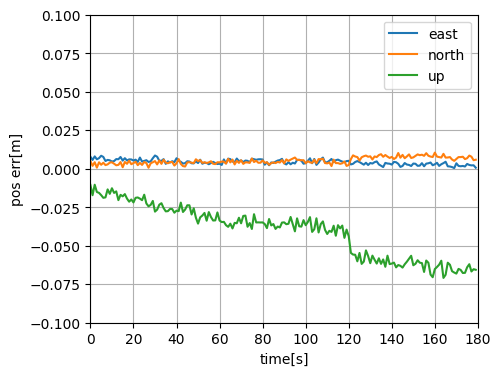

In [11]:
def plt_enu(t, enu, dmax=0.1):
    plt.figure(figsize=(5,4))
    plt.plot(t, enu)
    plt.ylabel('pos err[m]')
    plt.xlabel('time[s]')
    plt.legend(['east', 'north', 'up'])
    plt.grid()
    plt.axis([0, nep, -dmax, dmax])
    plt.show()

plt_enu(t, enu)

## Example 5: PPP-RTK positioning (QZSS CLAS)

This section demonstrates PPP-RTK positioning using uncombined receiver observations and recorded QZSS
L6 binary messages.

First, load the required Python modules.

In [17]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
from sys import stdout
from binascii import unhexlify

import cssrlib.gnss as gn
from cssrlib.cssrlib import cssr
from cssrlib.gnss import ecef2pos, Nav, time2gpst, timediff, time2str, time2doy
from cssrlib.gnss import rSigRnx, sys2str, epoch2time
from cssrlib.peph import atxdec, searchpcv
from cssrlib.ppprtk import ppprtkpos
from cssrlib.rinex import rnxdec

Define the RINEX observation, navigation, and antenna files, and starting epoch

In [18]:
ep = [2025, 8, 21, 7, 0, 0]  # year, month, day, hour, min, sec
time = epoch2time(ep)
doy = int(time2doy(time)) 
bdir = f'cssrlib-data/data/doy{ep[0]:04d}-{doy:03d}/'
navfile = bdir+f'{doy:03d}h_rnx.nav'
obsfile = bdir+f'{doy:03d}h_rnx.obs'
atxfile = 'cssrlib-data/data/antex/igs20.atx'

nav = Nav()
nav = dec.decode_nav(navfile, nav)

atx = atxdec()
atx.readpcv(atxfile)

For reference, specify the rover position.

In [19]:
xyz_ref = [-3962108.7007, 3381309.5532, 3668678.6648]
pos_ref = ecef2pos(xyz_ref)

QZSS CLAS correction messages are encoded in Compact SSR format. In this example, the recorded L6 data is used. Also load the grid position of QZSS CLAS as defined in IS-QZSS-L6
.

In [20]:
file_l6 = bdir + f'{doy:03d}h_qzsl6.txt'
prn_ref = 199  # QZSS PRN
l6_ch = 0  # 0:L6D, 1:L6E

griddef = 'cssrlib-data/data/clas_grid.def'
cs = cssr()
cs.monlevel = 1
time = epoch2time(ep)
cs.week = time2gpst(time)[0]
cs.read_griddef(griddef)

Specify signals to be processed. We choose L1C/A+L2P(Y) for GPS, E1+E5a for Galileo, L1C+L2C(L) for QZSS.

In [22]:
sigs = [rSigRnx("GC1C"), rSigRnx("GC2W"),
        rSigRnx("EC1C"), rSigRnx("EC5Q"),
        rSigRnx("JC1C"), rSigRnx("JC2L"),
        rSigRnx("GL1C"), rSigRnx("GL2W"),
        rSigRnx("EL1C"), rSigRnx("EL5Q"),
        rSigRnx("JL1C"), rSigRnx("JL2L"),
        rSigRnx("GS1C"), rSigRnx("GS2W"),
        rSigRnx("ES1C"), rSigRnx("ES5Q"),
        rSigRnx("JS1C"), rSigRnx("JS2L")]

rnx = rnxdec()
rnx.setSignals(sigs)

Initialize position and antenna PCO/PCVs

In [24]:
if rnx.decode_obsh(obsfile) >= 0:
    # Auto-substitute signals
    rnx.autoSubstituteSignals()

    # Initialize position
    ppprtk = ppprtkpos(nav, rnx.pos, 'test_ppprtk.log')

    # Set PCO/PCV information
    nav.rcv_ant = searchpcv(atx.pcvr, rnx.ant,  rnx.ts)
    # Get equipment information
    print(f"[Rover] Receiver: {dec.rcv} Antenna: {dec.ant}")

[Rover] Receiver: SEPT MOSAICX5        Antenna: JAVRINGANT_DM   JVDM


Print available signals and selected signals

In [25]:
print("Available signals")
for sys, sigs in rnx.sig_map.items():
    txt = "{:7s} {}".format(sys2str(sys),
            ' '.join([sig.str() for sig in sigs.values()]))
    print(txt)

print("\nSelected signals")
for sys, tmp in rnx.sig_tab.items():
    txt = "{:7s} ".format(sys2str(sys))
    for _, sigs in tmp.items():
        txt += "{} ".format(' '.join([sig.str() for sig in sigs]))
    print(txt)


Available signals
GPS     C1C L1C D1C S1C C2W L2W D2W S2W C2L L2L D2L S2L C5Q L5Q D5Q S5Q
GLONASS C1C L1C D1C S1C C2C L2C D2C S2C C2P L2P D2P S2P C3Q L3Q D3Q S3Q
GALILEO C1C L1C D1C S1C C5Q L5Q D5Q S5Q C7Q L7Q D7Q S7Q C8Q L8Q D8Q S8Q C6C L6C D6C S6C
BEIDOU  C1P L1P D1P S1P C2I L2I D2I S2I C5P L5P D5P S5P C6I L6I D6I S6I C7D L7D D7D S7D C7I L7I D7I S7I
QZSS    C1C L1C D1C S1C C1E L1E D1E S1E C1L L1L D1L S1L C2L L2L D2L S2L C5Q L5Q D5Q S5Q
IRNSS   C1P L1P D1P S1P C5A L5A D5A S5A

Selected signals
GPS     C1C C2W L1C L2W S1C S2W 
GALILEO C1C C5Q L1C L5Q S1C S5Q 
QZSS    C1C C2L L1C L2L S1C S2L 


Get grid location and open L6 file

In [26]:
pos = ecef2pos(rnx.pos)
inet = cs.find_grid_index(pos)

dtype = [('wn', 'int'), ('tow', 'int'), ('prn', 'int'),
          ('type', 'int'), ('len', 'int'), ('nav', 'S500')]
v = np.genfromtxt(file_l6, dtype=dtype)

Set runtime to 3 minutes and initialize variables

In [27]:
nep = 3*60  # 3 minutes, increase this for longer run

t = np.zeros(nep)
tc = np.zeros(nep)
enu = np.ones((nep, 3))*np.nan
sol = np.zeros((nep, 4))
dop = np.zeros((nep, 4))
smode = np.zeros(nep, dtype=int)

Run PPP-RTK positioning using `ppprtkpos()` for 3 minutes. QZSS L6 messages are encoded in sub-frames (5 second per sub-frame), for the simple implementation, the recorded data is decoded every 5 seconds.

In [28]:
# Skip epoch until start time
obs = rnx.decode_obs()
while time > obs.t and obs.t.time != 0:
    obs = rnx.decode_obs()

for ne in range(nep):
    week, tow = time2gpst(obs.t)

    vi = v[(v['tow'] == tow) & (v['type'] == l6_ch)
            & (v['prn'] == prn_ref)]
    if len(vi) > 0:
        cs.decode_l6msg(unhexlify(vi['nav'][0]), 0)
        if cs.fcnt == 5:  # end of sub-frame
            cs.decode_cssr(bytes(cs.buff), 0)

    if ne == 0:
        nav.t = deepcopy(obs.t)
        t0 = deepcopy(obs.t)
        t0.time = t0.time//30*30
        cs.time = obs.t
        nav.time_p = t0

    cstat = cs.chk_stat()
    if cstat:
        ppprtk.process(obs, cs=cs)

    t[ne] = timediff(nav.t, t0) / 60

    sol = nav.xa[0:3] if nav.smode == 4 else nav.x[0:3]
    enu[ne, :] = gn.ecef2enu(pos_ref, sol-xyz_ref)
    smode[ne] = nav.smode

    # Log to standard output
    stdout.write('\r {} ENU {:7.3f} {:7.3f} {:7.3f}, 2D {:6.3f}, mode {:1d}'
                  .format(time2str(obs.t),
                          enu[ne, 0], enu[ne, 1], enu[ne, 2],
                          np.sqrt(enu[ne, 0]**2+enu[ne, 1]**2),
                          smode[ne]))

    # Get new epoch, exit after last epoch
    obs = rnx.decode_obs()
    if obs.t.time == 0:
        break

rnx.fobs.close()


 2025-08-21 07:03:00 ENU   0.015   0.001  -0.093, 2D  0.015, mode 4

RTK mode status (4: fix, 5: float, 0: no-solution) is defined for plotting.

In [29]:
idx4 = np.where(smode == 4)[0]
idx5 = np.where(smode == 5)[0]
idx0 = np.where(smode == 0)[0]

Plot the solution position relative to the reference position.

A complete set of QZSS CLAS corrections is available every 30 seconds.  An ambiguity-fixed solution, as indicated by the green dots in the plot, is available just after the QZSS CLAS correction messages have been received. As expected,
the positioning errors are at centimeter level.

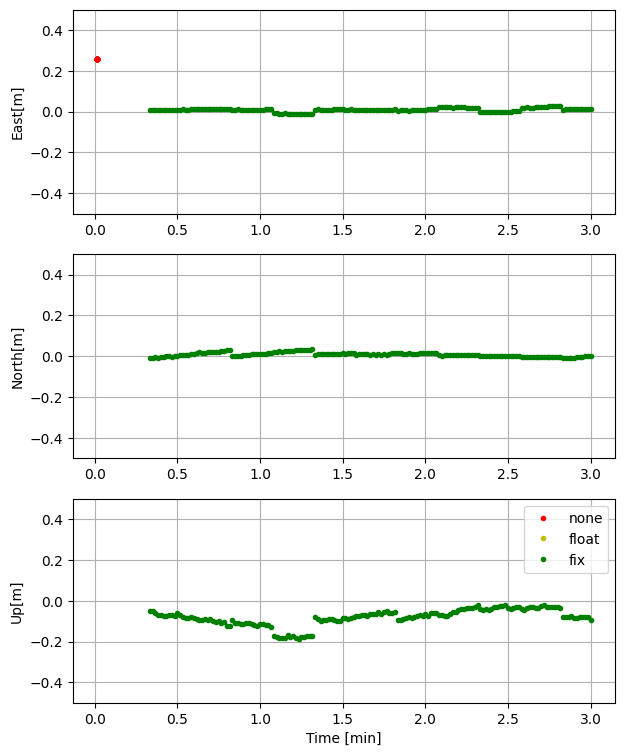

In [ ]:
ylim = 1.0

fig = plt.figure(figsize=[7, 9])
fig.set_rasterized(True)
fmt = '%H:%M'

lbl_t = ['East[m]', 'North[m]', 'Up[m]']
for k in range(3):
    plt.subplot(3, 1, k+1)
    plt.plot(t[idx0], enu[idx0, k], 'r.', label='none')
    plt.plot(t[idx5], enu[idx5, k], 'y.', label='float')
    plt.plot(t[idx4], enu[idx4, k], 'g.', label='fix')

    if k == 2:
        plt.xlabel('Time [min]')
        plt.legend()
    plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))
    plt.ylabel(lbl_t[k])
    plt.grid()
    plt.ylim([-ylim, ylim])
plt.show()

Plot the horizontal errors.

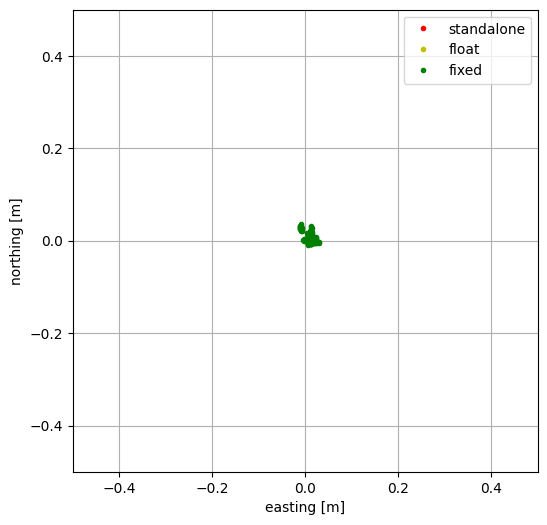

In [31]:
fig = plt.figure(figsize=[6,6])
plt.plot(enu[idx0, 0],enu[idx0, 1], 'r.', label='standalone')
plt.plot(enu[idx5, 0],enu[idx5, 1], 'y.', label='float')
plt.plot(enu[idx4, 0],enu[idx4, 1], 'g.', label='fixed')
plt.xlabel('easting [m]')
plt.ylabel('northing [m]')
plt.axis([-ylim,ylim,-ylim,ylim])
plt.grid()
plt.legend()
plt.show()


## Example 6: PPP-AR positioning (IGS)

This section demonstrates PPP positioning using IGS offline products from the International GNSS Service (IGS) and a Septentrio PolaRx5 receiver. In this case, the orbit and clock offset information is obtained from
SP3 files and, optionally, Clock-RINEX files can be used. Pseudorange and carrier-phase observable specific biases (OSBs) are
loaded from Bias-SINEX files.

First, load the required Python modules.

In [32]:
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
from sys import stdout

import cssrlib.gnss as gn
from cssrlib.gnss import ecef2pos, Nav
from cssrlib.gnss import time2doy, time2str, timediff, epoch2time
from cssrlib.gnss import rSigRnx
from cssrlib.gnss import sys2str
from cssrlib.peph import atxdec, searchpcv
from cssrlib.peph import peph, biasdec
from cssrlib.pppssr import pppos
from cssrlib.rinex import rnxdec

Define the input data and parameters for this example. For signals, we choosed L1C/A+L2P(Y) for GPS, E1+E5a for Galileo.

In [ ]:
# Start epoch, number of epochs
ep = [2025, 8, 21, 7, 0, 0]

time = epoch2time(ep)
year = ep[0]
doy = int(time2doy(time))

let = chr(ord('a')+ep[3])
bdir = f'cssrlib-data/data/doy{ep[0]:04d}-{doy:03d}/'
navfile = bdir+f'{doy:03d}{let}_rnx.nav'
obsfile = bdir+f'{doy:03d}{let}_rnx.obs'

ac = 'COD0OPSFIN'

orbfile = bdir+f'../igs/{ac}_{year:4d}{doy:03d}0000_01D_05M_ORB.SP3'
clkfile = bdir+f'../igs/{ac}_{year:4d}{doy:03d}0000_01D_30S_CLK.CLK'
bsxfile = bdir+f'../igs/{ac}_{year:4d}{doy:03d}0000_01D_01D_OSB.BIA'

# Set user reference position
xyz_ref = [-3962108.6836, 3381309.5672, 3668678.6720]
pos_ref = ecef2pos(xyz_ref)

# Define signals to be processed
sigs = [rSigRnx("GC1C"), rSigRnx("GC2W"),
        rSigRnx("GL1C"), rSigRnx("GL2W"),
        rSigRnx("GS1C"), rSigRnx("GS2W"),
        rSigRnx("EC1C"), rSigRnx("EC5Q"),
        rSigRnx("EL1C"), rSigRnx("EL5Q"),
        rSigRnx("ES1C"), rSigRnx("ES5Q")]

atxfile = bdir+'../antex/I20.ATX'

Load and parse the input data

In [47]:
rnx = rnxdec()
rnx.setSignals(sigs)

nav = Nav()
orb = peph()

nav.pmode = 0 # Positioning mode: 0:static, 1:kinematic

# Decode RINEX NAV data
nav = rnx.decode_nav(navfile, nav)

# Load precise orbits and clock offsets
nav = orb.parse_sp3(orbfile, nav)
nav = rnx.decode_clk(clkfile, nav)

# Load code and phase biases from Bias-SINEX
bsx = biasdec()
bsx.parse(bsxfile)

# Load ANTEX data for satellites and stations
atx = atxdec()
atx.readpcv(atxfile)

nav.monlevel = 0  # Logging level

# Load RINEX OBS file header
if rnx.decode_obsh(obsfile) >= 0:

    # Auto-substitute signals
    rnx.autoSubstituteSignals()

    # Initialize position
    ppp = pppos(nav, rnx.pos, 'test_pppigs.log')
    nav.ephopt = 4  # IGS
    nav.armode = 3  # 1: continuous, 3: fix-and-hold
    nav.parmode = 1 # 1: normal, 2: partial ambiguity resolution

    # change default settings
    nav.elmin = np.deg2rad(10.0)  # min sat elevation
    nav.thresar = 2.0            # ambiguity resolution threshold

    # Set PCO/PCV information
    nav.sat_ant = atx.pcvs
    nav.rcv_ant = searchpcv(atx.pcvr, rnx.ant,  rnx.ts)

Print the available and selected satellite signals

In [48]:
print("Available signals")
for sys, sigs in rnx.sig_map.items():
  txt = "{:7s} {}".format(sys2str(sys),
        ' '.join([sig.str() for sig in sigs.values()]))
  print(txt)

print("\nSelected signals")
for sys, tmp in rnx.sig_tab.items():
  txt = "{:7s} ".format(sys2str(sys))
  for _, sigs in tmp.items():
    txt += "{} ".format(' '.join([sig.str() for sig in sigs]))
  print(txt)

Available signals
GPS     C1C L1C D1C S1C C2W L2W D2W S2W C2L L2L D2L S2L C5Q L5Q D5Q S5Q
GLONASS C1C L1C D1C S1C C2C L2C D2C S2C C2P L2P D2P S2P C3Q L3Q D3Q S3Q
GALILEO C1C L1C D1C S1C C5Q L5Q D5Q S5Q C7Q L7Q D7Q S7Q C8Q L8Q D8Q S8Q C6C L6C D6C S6C
BEIDOU  C1P L1P D1P S1P C2I L2I D2I S2I C5P L5P D5P S5P C6I L6I D6I S6I C7D L7D D7D S7D C7I L7I D7I S7I
QZSS    C1C L1C D1C S1C C1E L1E D1E S1E C1L L1L D1L S1L C2L L2L D2L S2L C5Q L5Q D5Q S5Q
IRNSS   C1P L1P D1P S1P C5A L5A D5A S5A

Selected signals
GPS     C1C C2W L1C L2W S1C S2W 
GALILEO C1C C5Q L1C L5Q S1C S5Q 


Run solution for 15 minutes (ok to abort before finished)

In [49]:
# increase to run longer, set to 10 minutes to see ambiguity resolution
nep = 15 * 60  # 15 minutes

# Intialize data structures for results
t = np.zeros(nep)
tc = np.zeros(nep)
enu = np.ones((nep, 3))*np.nan
sol = np.zeros((nep, 4))
dop = np.zeros((nep, 4))
ztd = np.zeros((nep, 1))
smode = np.zeros(nep, dtype=int)

# Skip epochs until start time
obs = rnx.decode_obs()
while time > obs.t and obs.t.time != 0:
    obs = rnx.decode_obs()

# Loop over number of epoch from file start
for ne in range(nep):

    # Set initial epoch
    if ne == 0:
        nav.t = deepcopy(obs.t)
        t0 = deepcopy(obs.t)

    # Call PPP module with IGS products
    ppp.process(obs, orb=orb, bsx=bsx)

    # Save output
    t[ne] = timediff(nav.t, t0) / 86400.0

    sol = nav.xa[0:3] if nav.smode == 4 else nav.x[0:3]
    enu[ne, :] = gn.ecef2enu(pos_ref, sol-xyz_ref)

    ztd[ne] = nav.xa[ppp.IT(nav.na)] if nav.smode == 4 else nav.x[ppp.IT(nav.na)]
    smode[ne] = nav.smode

    # Log to standard output
    stdout.write('\r {} ENU {:7.3f} {:7.3f} {:7.3f}, 2D {:6.3f}, mode {:1d}'
                 .format(time2str(obs.t),
                         enu[ne, 0], enu[ne, 1], enu[ne, 2],
                         np.sqrt(enu[ne, 0]**2+enu[ne, 1]**2),
                         smode[ne]))

    # Get new epoch, exit after last epoch
    obs = rnx.decode_obs()
    if obs.t.time == 0:
        break

rnx.fobs.close()


 2025-08-21 07:15:00 ENU  -0.206   0.105  -0.272, 2D  0.232, mode 5

Plot results.

The default run length is set to 5 minutes to keep the tutorial moving, but if the run length is increased to 15 minutes, it will be seen that the horizontal errors reach less than 10 cm after approximately 6 minutes and ambiguity resolution is achieved after less than 9 minutes

C:\Users\ruihi\AppData\Local\Temp\ipykernel_9776\4131380391.py:15: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(t[idx0], enu[idx0, k], 'r.')
C:\Users\ruihi\AppData\Local\Temp\ipykernel_9776\4131380391.py:16: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(t[idx5], enu[idx5, k], 'y.')
C:\Users\ruihi\AppData\Local\Temp\ipykernel_9776\4131380391.py:17: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(t[idx4], enu[idx4, k], 'g.')
C:\Users\ruihi\AppData\Local\Temp\ipykernel_9776\4131380391.py:25: MatplotlibDeprecationWarning: The plot_date function was deprecated in Matplotlib 3.9 and will be removed in 3.11. Use plot instead.
  plt.plot_date(t[idx0], ztd[idx0]*1e2, 'r.', markersize=8, label

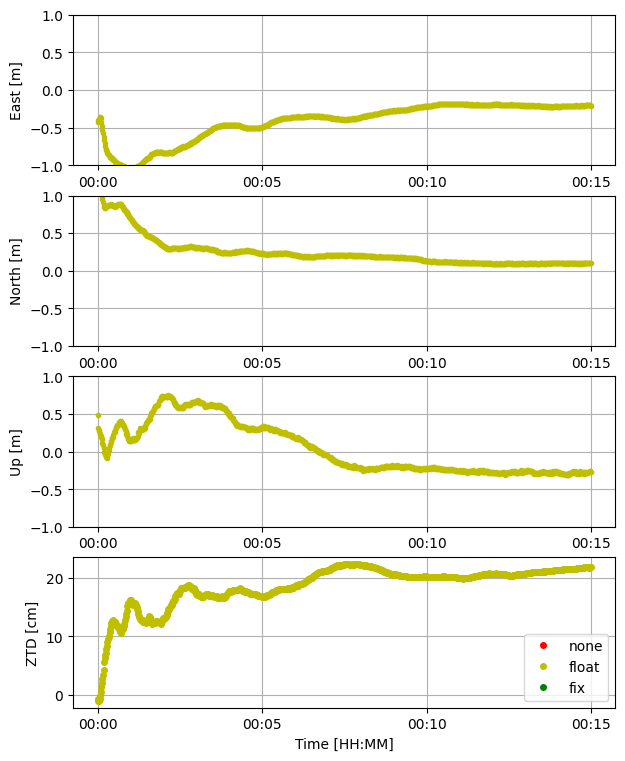

In [ ]:
ylim = 1.0

idx4 = np.where(smode == 4)[0]   # fix
idx5 = np.where(smode == 5)[0]   # float
idx0 = np.where(smode == 0)[0]   # none

fig = plt.figure(figsize=[7, 9])
fig.set_rasterized(True)
fmt = '%H:%M'

lbl_t = ['East [m]', 'North [m]', 'Up [m]']

for k in range(3):
    plt.subplot(4, 1, k+1)
    plt.plot(t[idx0], enu[idx0, k], 'r.')
    plt.plot(t[idx5], enu[idx5, k], 'y.')
    plt.plot(t[idx4], enu[idx4, k], 'g.')

    plt.ylabel(lbl_t[k])
    plt.grid()
    plt.ylim([-ylim, ylim])
    plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))

plt.subplot(4, 1, 4)
plt.plot(t[idx0], ztd[idx0]*1e2, 'r.', markersize=8, label='none')
plt.plot(t[idx5], ztd[idx5]*1e2, 'y.', markersize=8, label='float')
plt.plot(t[idx4], ztd[idx4]*1e2, 'g.', markersize=8, label='fix')
plt.ylabel('ZTD [cm]')
plt.grid()
plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))

plt.xlabel('Time [HH:MM]')
plt.legend()


## Example 7: PPP positioning (BeiDou PPP)

This section demonstrates PPP-RTK positioning using BeiDou B1C and B2a pilot observations for BeiDou-3 B2b PPP and GPS L1 C/A and L2 P(Y) with a Septentrio PolaRx5 receiver.

First, load the required Python modules.

In [7]:
from binascii import unhexlify
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
from sys import stdout

import cssrlib.gnss as gn
from cssrlib.gnss import ecef2pos, Nav
from cssrlib.gnss import time2gpst, time2doy, time2str, timediff, epoch2time
from cssrlib.gnss import rSigRnx
from cssrlib.gnss import sys2str
from cssrlib.peph import atxdec, searchpcv
from cssrlib.peph import peph
from cssrlib.cssr_bds import cssr_bds
from cssrlib.pppssr import pppos
from cssrlib.rinex import rnxdec

Define the input data and parameters for this example. For signals, we choose L1C/A+L2P(Y) for GPS, B1C(P)+B2a(P) for BDS.

In [8]:
ep = [2025, 8, 21, 7, 0, 0] # start epoch

time = epoch2time(ep)
year = ep[0]
doy = int(time2doy(time))

let = chr(ord('a')+ep[3])
bdir = f'cssrlib-data/data/doy{ep[0]:04d}-{doy:03d}/'
navfile = bdir+f'{doy:03d}{let}_rnx.nav'
obsfile = bdir+f'{doy:03d}{let}_rnx.obs'
atxfile = bdir+'../antex/igs20.atx'

file_bds = bdir+f'{doy:03d}{let}_bdsb2b.txt'
prn_ref = 59  # satellite PRN to receive BDS PPP collection

dtype = [('wn', 'int'), ('tow', 'int'), ('prn', 'int'),
         ('type', 'int'), ('len', 'int'), ('nav', 'S124')]

xyz_ref = [-3962108.6836, 3381309.5672, 3668678.6720]
pos_ref = ecef2pos(xyz_ref)

# Define signals to be processed
sigs = [rSigRnx("GC1C"), rSigRnx("GC2W"),
        rSigRnx("GL1C"), rSigRnx("GL2W"),
        rSigRnx("GS1C"), rSigRnx("GS2W"),
        rSigRnx("CC1P"), rSigRnx("CC5P"),
        rSigRnx("CL1P"), rSigRnx("CL5P"),
        rSigRnx("CS1P"), rSigRnx("CS5P")]

time = epoch2time(ep)
year = ep[0]
doy = int(time2doy(time))

Load and parse the input data

In [9]:
rnx = rnxdec()
rnx.setSignals(sigs)

nav = Nav()
orb = peph()

nav.pmode = 0 # Positioning mode: 0:static, 1:kinematic

# Decode RINEX NAV data
nav = rnx.decode_nav(navfile, nav)

# Load PPP corrections
v = np.genfromtxt(file_bds, dtype=dtype)

cs = cssr_bds()
cs.monlevel = 0

# Load ANTEX data for satellites and stations
atx = atxdec()
atx.readpcv(atxfile)

nav.monlevel = 0  # Logging level

# Load RINEX OBS file header
if rnx.decode_obsh(obsfile) >= 0:

    # Auto-substitute signals
    rnx.autoSubstituteSignals()

    # Initialize position
    ppp = pppos(nav, rnx.pos, 'test_pppbds.log')

    # Set PCO/PCV information
    nav.sat_ant = atx.pcvs
    nav.rcv_ant = searchpcv(atx.pcvr, rnx.ant,  rnx.ts)

Print the available and selected satellite signals

In [10]:
print("Available signals")
for sys, sigs in rnx.sig_map.items():
  txt = "{:7s} {}".format(sys2str(sys),
        ' '.join([sig.str() for sig in sigs.values()]))
  print(txt)

print("\nSelected signals")
for sys, tmp in rnx.sig_tab.items():
  txt = "{:7s} ".format(sys2str(sys))
  for _, sigs in tmp.items():
    txt += "{} ".format(' '.join([sig.str() for sig in sigs]))
  print(txt)

Available signals
GPS     C1C L1C D1C S1C C2W L2W D2W S2W C2L L2L D2L S2L C5Q L5Q D5Q S5Q
GLONASS C1C L1C D1C S1C C2C L2C D2C S2C C2P L2P D2P S2P C3Q L3Q D3Q S3Q
GALILEO C1C L1C D1C S1C C5Q L5Q D5Q S5Q C7Q L7Q D7Q S7Q C8Q L8Q D8Q S8Q C6C L6C D6C S6C
BEIDOU  C1P L1P D1P S1P C2I L2I D2I S2I C5P L5P D5P S5P C6I L6I D6I S6I C7D L7D D7D S7D C7I L7I D7I S7I
QZSS    C1C L1C D1C S1C C1E L1E D1E S1E C1L L1L D1L S1L C2L L2L D2L S2L C5Q L5Q D5Q S5Q
IRNSS   C1P L1P D1P S1P C5A L5A D5A S5A

Selected signals
GPS     C1C C2W L1C L2W S1C S2W 
BEIDOU  C1P C5P L1P L5P S1P S5P 


Process data for 15 minutes (ok to abort before finished)

In [11]:
nep = 15 * 60  # increase this to run longer

# Intialize data structures for results
t = np.zeros(nep)
tc = np.zeros(nep)
enu = np.ones((nep, 3))*np.nan
sol = np.zeros((nep, 4))
dop = np.zeros((nep, 4))
ztd = np.zeros((nep, 1))
smode = np.zeros(nep, dtype=int)

# Skip epochs until start time
obs = rnx.decode_obs()
while time > obs.t and obs.t.time != 0:
    obs = rnx.decode_obs()

# Loop over number of epoch from file start
for ne in range(nep):
    week, tow = time2gpst(obs.t)
    cs.week = week
    cs.tow0 = tow // 86400 * 86400

    # Set intial epoch
    if ne == 0:
        nav.t = deepcopy(obs.t)
        t0 = deepcopy(obs.t)
        t0.time = t0.time // 30 * 30
        nav.time_p = t0

    vi = v[(v['tow'] == tow) & (v['prn'] == prn_ref)]
    if len(vi) > 0:
        buff = unhexlify(vi['nav'][0])
        cs.decode_cssr(buff, 0)

    # Call PPP module with BDS-PPP corrections
    if (cs.lc[0].cstat & 0xf) == 0xf:
        ppp.process(obs, cs=cs)

    # Save output
    t[ne] = timediff(nav.t, t0) / 86400.0

    sol = nav.xa[0:3] if nav.smode == 4 else nav.x[0:3]
    enu[ne, :] = gn.ecef2enu(pos_ref, sol-xyz_ref)

    ztd[ne] = nav.xa[ppp.IT(nav.na)] if nav.smode == 4 else nav.x[ppp.IT(nav.na)]
    smode[ne] = nav.smode

    # Log to standard output
    stdout.write('\r {} ENU {:7.3f} {:7.3f} {:7.3f}, 2D {:6.3f}, mode {:1d}'
                 .format(time2str(obs.t),
                         enu[ne, 0], enu[ne, 1], enu[ne, 2],
                         np.sqrt(enu[ne, 0]**2+enu[ne, 1]**2),
                         smode[ne]))

    # Get new epoch, exit after last epoch
    obs = rnx.decode_obs()
    if obs.t.time == 0:
        break

rnx.fobs.close()

 2025-08-21 07:00:27 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few satellites < 6: nsat=3
 2025-08-21 07:15:00 ENU  -0.127  -0.045   0.302, 2D  0.135, mode 5

Plot results

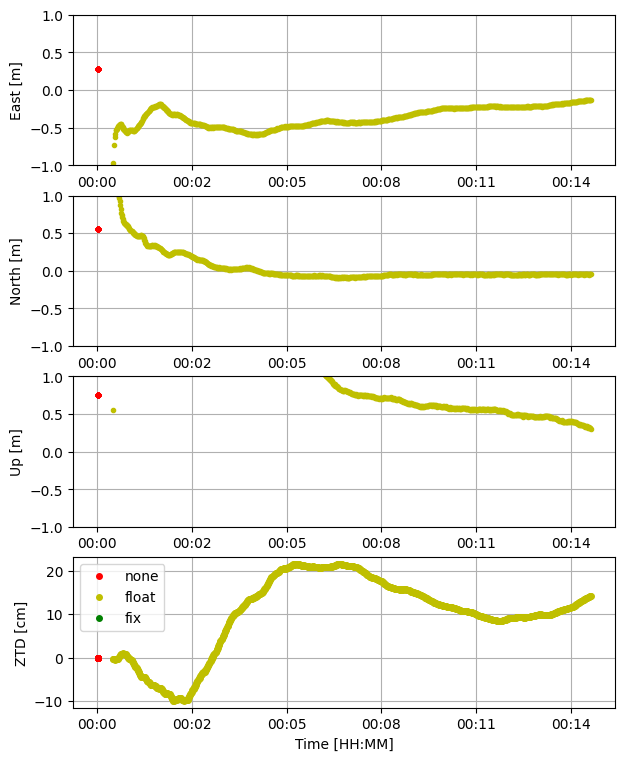

In [12]:
ylim = 1.0

idx4 = np.where(smode == 4)[0]
idx5 = np.where(smode == 5)[0]
idx0 = np.where(smode == 0)[0]

fig = plt.figure(figsize=[7, 9])
fig.set_rasterized(True)
lbl_t = ['East [m]', 'North [m]', 'Up [m]']
fmt = '%H:%M'

for k in range(3):
    plt.subplot(4, 1, k+1)
    plt.plot(t[idx0], enu[idx0, k], 'r.')
    plt.plot(t[idx5], enu[idx5, k], 'y.')
    plt.plot(t[idx4], enu[idx4, k], 'g.')

    plt.ylabel(lbl_t[k])
    plt.grid()
    plt.ylim([-ylim, ylim])
    plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))

plt.subplot(4, 1, 4)
plt.plot(t[idx0], ztd[idx0]*1e2, 'r.', markersize=8, label='none')
plt.plot(t[idx5], ztd[idx5]*1e2, 'y.', markersize=8, label='float')
plt.plot(t[idx4], ztd[idx4]*1e2, 'g.', markersize=8, label='fix')
plt.ylabel('ZTD [cm]')
plt.grid()
plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))

plt.xlabel('Time [HH:MM]')
plt.legend()



## Example 8: PPP positioning (Galileo HAS)

This section demonstrates PPP positioning using Galileo HAS corrections with a Septentrio PolaRx5 receiver.

First, load the required Python modules.

In [28]:
from copy import deepcopy
import matplotlib.pyplot as plt
import matplotlib.dates as md
import numpy as np
from binascii import unhexlify
import bitstruct as bs
from sys import stdout

import cssrlib.gnss as gn
from cssrlib.gnss import ecef2pos, Nav, rSigRnx, sys2str
from cssrlib.gnss import time2gpst, time2doy, time2str, timediff, epoch2time
from cssrlib.peph import atxdec, searchpcv
from cssrlib.cssr_has import cssr_has
from cssrlib.pppssr import pppos
from cssrlib.rinex import rnxdec

Define the input data and parameters for this example

In [30]:
# Start epoch and number of epochs
ep = [2025, 8, 21, 7, 0, 0] # start epoch

time = epoch2time(ep)
year = ep[0]
doy = int(time2doy(time))

let = chr(ord('a')+ep[3])
bdir = f'cssrlib-data/data/doy{ep[0]:04d}-{doy:03d}/'
navfile = bdir+f'{doy:03d}{let}_rnx.nav'
obsfile = bdir+f'{doy:03d}{let}_rnx.obs'
atxfile = bdir+'../antex/igs20.atx'

# Specify Galile HAS corrections files
file_has = bdir+f'{doy:03d}{let}_gale6.txt'
# Table for Reed-Solomon decoding
file_gm = bdir+"../../samples/Galileo-HAS-SIS-ICD_1.0_Annex_B_Reed_Solomon_Generator_Matrix.txt"

dtype = [('wn', 'int'), ('tow', 'int'), ('prn', 'int'),
         ('type', 'int'), ('len', 'int'), ('nav', 'S124')]

# Set user reference position
xyz_ref = [-3962108.6836, 3381309.5672, 3668678.6720]
pos_ref = ecef2pos(xyz_ref)

# Define signals to be processed
sigs = [rSigRnx("GC1C"), rSigRnx("GC2L"),
        rSigRnx("GL1C"), rSigRnx("GL2L"),
        rSigRnx("GS1C"), rSigRnx("GS2L"),
        rSigRnx("EC1C"), rSigRnx("EC5Q"),
        rSigRnx("EL1C"), rSigRnx("EL5Q"),
        rSigRnx("ES1C"), rSigRnx("ES5Q")]


Load and parse the input data

In [ ]:
rnx = rnxdec()
rnx.setSignals(sigs)

nav = Nav()
# orb = peph()

nav.pmode = 0 # Positioning mode: 0:static, 1:kinematic

# Decode RINEX NAV data
nav = rnx.decode_nav(navfile, nav)

# Load PPP corrections
v = np.genfromtxt(file_has, dtype=dtype)
gMat = np.genfromtxt(file_gm, dtype="u1", delimiter=",")

# Load ANTEX data for satellites and stations
atx = atxdec()
atx.readpcv(atxfile)

cs = cssr_has()
# cs.monlevel = 2
nav.monlevel = 0  # Logging level

# Load RINEX OBS file header
if rnx.decode_obsh(obsfile) >= 0:

    # Auto-substitute signals
    rnx.autoSubstituteSignals()

    # Initialize position
    ppp = pppos(nav, rnx.pos, 'test_ppphas.log')

    # Modify default config parameters
    nav.elmin = np.deg2rad(5.0)  # min sat el

    # Set PCO/PCV information
    nav.sat_ant = atx.pcvs
    nav.rcv_ant = searchpcv(atx.pcvr, rnx.ant,  rnx.ts)

Print the available satellite and selected signals. We choose L1C/A+L2P(Y) for GPS, E1+E5b for Galileo.

In [32]:
print("Available signals")
for sys, sigs in rnx.sig_map.items():
  txt = "{:7s} {}".format(sys2str(sys),
        ' '.join([sig.str() for sig in sigs.values()]))
  print(txt)

print("\nSelected signals")
for sys, tmp in rnx.sig_tab.items():
  txt = "{:7s} ".format(sys2str(sys))
  for _, sigs in tmp.items():
    txt += "{} ".format(' '.join([sig.str() for sig in sigs]))
  print(txt)

Available signals
GPS     C1C L1C D1C S1C C2W L2W D2W S2W C2L L2L D2L S2L C5Q L5Q D5Q S5Q
GLONASS C1C L1C D1C S1C C2C L2C D2C S2C C2P L2P D2P S2P C3Q L3Q D3Q S3Q
GALILEO C1C L1C D1C S1C C5Q L5Q D5Q S5Q C7Q L7Q D7Q S7Q C8Q L8Q D8Q S8Q C6C L6C D6C S6C
BEIDOU  C1P L1P D1P S1P C2I L2I D2I S2I C5P L5P D5P S5P C6I L6I D6I S6I C7D L7D D7D S7D C7I L7I D7I S7I
QZSS    C1C L1C D1C S1C C1E L1E D1E S1E C1L L1L D1L S1L C2L L2L D2L S2L C5Q L5Q D5Q S5Q
IRNSS   C1P L1P D1P S1P C5A L5A D5A S5A

Selected signals
GPS     C1C C2L L1C L2L S1C S2L 
GALILEO C1C C5Q L1C L5Q S1C S5Q 


Process data for 15 minutes (ok to abort before finished)

In [33]:
nep = 15 * 60  # increase this to run longer

# Intialize data structures for results
t = np.zeros(nep)
enu = np.ones((nep, 3))*np.nan
sol = np.zeros((nep, 4))
ztd = np.zeros((nep, 1))
smode = np.zeros(nep, dtype=int)
nsat = np.zeros((nep, 3), dtype=int)

# Init variables
mid_, ms_, icnt = -1, -1, 0
rec, mid_decoded = [], []
has_pages = np.zeros((255, 53), dtype=int)

# Skip epochs until start time
obs = rnx.decode_obs()
while time > obs.t and obs.t.time != 0:
    obs = rnx.decode_obs()

# Loop over number of epoch from file start
for ne in range(nep):
    week, tow = time2gpst(obs.t)
    cs.week = week
    cs.tow0 = tow // 3600 * 3600

    # Set initial epoch
    if ne == 0:
        nav.t = deepcopy(obs.t)
        t0 = deepcopy(obs.t)
        t0.time = t0.time // 30 * 30
        nav.time_p = t0

    vi = v[v['tow'] == tow]
    for vn in vi:
        buff = unhexlify(vn['nav'])
        i = 14
        if bs.unpack_from('u24', buff, i)[0] == 0xaf3bc3:
            continue
        hass, res = bs.unpack_from('u2u2', buff, i)
        i += 4
        if hass >= 2:  # 0:test,1:operational,2:res,3:dnu
            continue
        mt, mid, ms, pid = bs.unpack_from('u2u5u5u8', buff, i)

        cs.msgtype = mt
        ms += 1
        i += 20

        if mid_ == -1 and mid not in mid_decoded:
            mid_ = mid
            ms_ = ms
        if mid == mid_ and pid-1 not in rec:
            page = bs.unpack_from('u8'*53, buff, i)
            rec += [pid-1]
            has_pages[pid-1, :] = page

    if len(rec) >= ms_:
        if cs.monlevel >= 2:
            print(f" data collected mid={mid_:2d} ms={ms_:2d} tow={tow:.0f}")
        HASmsg = cs.decode_has_page(rec, has_pages, gMat, ms_)
        cs.decode_cssr(HASmsg)
        rec = []

        mid_decoded += [mid_]
        mid_ = -1
        if len(mid_decoded) > 10:
            mid_decoded = mid_decoded[1:]
    else:
        icnt += 1
        if icnt > 2*ms_ and mid_ != -1:
            icnt = 0
            if cs.monlevel >= 2:
                print(f" reset mid={mid_} ms={ms_} tow={tow}")
            rec = []
            mid_ = -1

    # Call PPP module with HAS corrections
    if (cs.lc[0].cstat & 0xf) == 0xf:
        ppp.process(obs, cs=cs)

    # Save output
    t[ne] = timediff(nav.t, t0) / 86400.0

    sol = nav.xa[0:3] if nav.smode == 4 else nav.x[0:3]
    enu[ne, :] = gn.ecef2enu(pos_ref, sol-xyz_ref)

    ztd[ne] = nav.xa[ppp.IT(nav.na)] if nav.smode == 4 else nav.x[ppp.IT(nav.na)]
    smode[ne] = nav.smode
    nsat[ne, :] = nav.nsat

    nav.fout.write("{} {:14.4f} {:14.4f} {:14.4f} "
                    "ENU {:7.3f} {:7.3f} {:7.3f}, 2D {:6.3f}, mode {:1d}\n"
                    .format(time2str(obs.t),
                            sol[0], sol[1], sol[2],
                            enu[ne, 0], enu[ne, 1], enu[ne, 2],
                            np.sqrt(enu[ne, 0]**2+enu[ne, 1]**2),
                            smode[ne]))

    stdout.write('\r {} ENU {:7.3f} {:7.3f} {:7.3f}, 2D {:6.3f}, mode {:1d} nsat {:2d}/{:2d}/{:2d}'
                 .format(time2str(obs.t),
                         enu[ne, 0], enu[ne, 1], enu[ne, 2],
                         np.sqrt(enu[ne, 0]**2+enu[ne, 1]**2),
                         smode[ne],
                         nsat[ne, 0], nsat[ne, 1], nsat[ne, 2]))

    # Get new epoch, exit after last epoch
    obs = rnx.decode_obs()
    if obs.t.time == 0:
        break

stdout.write('\n')
rnx.fobs.close()


 2025-08-21 07:00:02 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 nsat  0/ 0/ 0 data collected mid=26 ms=11 tow=370803
 2025-08-21 07:00:07 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 nsat  0/ 0/ 0 data collected mid=27 ms= 2 tow=370808
 2025-08-21 07:00:17 ENU  -1.298   0.549   1.188, 2D  1.409, mode 5 nsat 20/16/15 data collected mid=28 ms= 2 tow=370818
 2025-08-21 07:00:27 ENU  -1.176   0.545   0.985, 2D  1.296, mode 5 nsat 20/16/15 data collected mid=29 ms= 2 tow=370828
 2025-08-21 07:00:37 ENU  -1.066   0.644   0.678, 2D  1.245, mode 5 nsat 20/16/15 data collected mid=30 ms= 2 tow=370838
 2025-08-21 07:00:47 ENU  -0.952   0.659   0.157, 2D  1.158, mode 5 nsat 20/16/15 data collected mid=31 ms= 2 tow=370848
 2025-08-21 07:00:50 ENU  -0.941   0.637   0.057, 2D  1.137, mode 5 nsat 20/16/15 reset mid=0 ms=11 tow=370851.0
 2025-08-21 07:00:53 ENU  -0.950   0.615  -0.096, 2D  1.131, mode 5 nsat 20/16/15 data collected mid= 0 ms=11 tow=370854
 2025-08-21 07:00:57 ENU  -0.940   0.592

Plot results

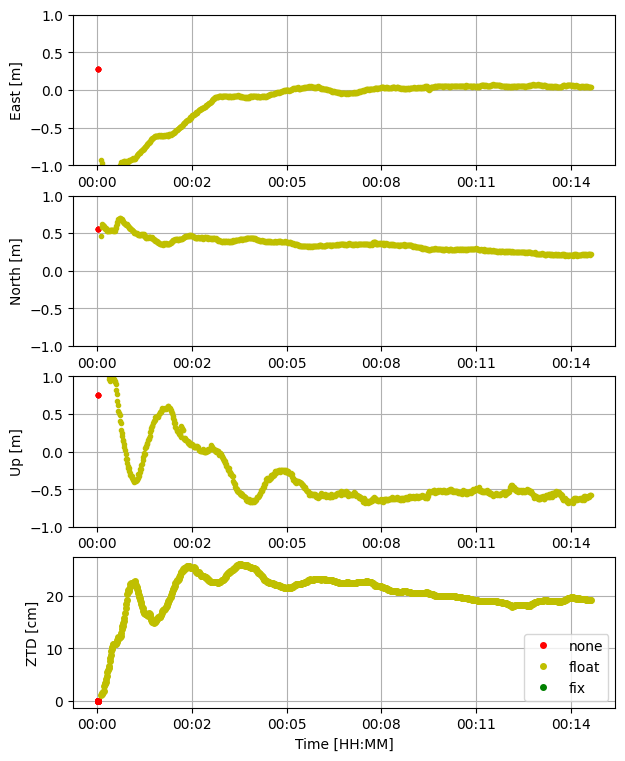

In [34]:
ylim = 1.0

idx4 = np.where(smode == 4)[0]
idx5 = np.where(smode == 5)[0]
idx0 = np.where(smode == 0)[0]

fig = plt.figure(figsize=[7, 9])
fig.set_rasterized(True)
fmt = '%H:%M'

lbl_t = ['East [m]', 'North [m]', 'Up [m]']

for k in range(3):
    plt.subplot(4, 1, k+1)
    plt.plot(t[idx0], enu[idx0, k], 'r.')
    plt.plot(t[idx5], enu[idx5, k], 'y.')
    plt.plot(t[idx4], enu[idx4, k], 'g.')

    plt.ylabel(lbl_t[k])
    plt.grid()
    plt.ylim([-ylim, ylim])
    plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))

plt.subplot(4, 1, 4)
plt.plot(t[idx0], ztd[idx0]*1e2, 'r.', markersize=8, label='none')
plt.plot(t[idx5], ztd[idx5]*1e2, 'y.', markersize=8, label='float')
plt.plot(t[idx4], ztd[idx4]*1e2, 'g.', markersize=8, label='fix')
plt.ylabel('ZTD [cm]')
plt.grid()
plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))

plt.xlabel('Time [HH:MM]')
plt.legend()



## Example 9: PPP positioning (MADOCA-PPP)

This section demonstrates PPP positioning using QZSS MADOCA-PPP corrections with a Septentrio mosaic-X5 receiver.

First, load the required Python modules.

In [36]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
from binascii import unhexlify
from sys import stdout

import cssrlib.gnss as gn
from cssrlib.gnss import ecef2pos, Nav
from cssrlib.gnss import time2gpst, time2doy, time2str, timediff, epoch2time
from cssrlib.gnss import rSigRnx
from cssrlib.gnss import sys2str
from cssrlib.peph import atxdec, searchpcv
from cssrlib.cssr_mdc import cssr_mdc
from cssrlib.pppssr import pppos
from cssrlib.rinex import rnxdec

Define the input data and parameters for this example

In [37]:
# Start epoch and number of epochs
ep = [2025, 8, 21, 7, 0, 0]

time = epoch2time(ep)
year = ep[0]
doy = int(time2doy(time))

let = chr(ord('a')+ep[3])
bdir = f'cssrlib-data/data/doy{ep[0]:04d}-{doy:03d}/'
navfile = bdir+f'{doy:03d}{let}_rnx.nav'
obsfile = bdir+f'{doy:03d}{let}_rnx.obs'
atxfile = bdir+'../antex/igs20.atx'

# Specify L6 corrections files
file_l6 = bdir+f'{doy:03d}{let}_qzsl6.txt'
prn_ref = 199  # QZSS PRN
l6_ch = 1  # 0:L6D, 1:L6E
dtype = [('wn', 'int'), ('tow', 'int'), ('prn', 'int'),
         ('type', 'int'), ('len', 'int'), ('nav', 'S500')]

# Set user reference position
xyz_ref = [-3962108.6836, 3381309.5672, 3668678.6720]
pos_ref = ecef2pos(xyz_ref)

# Define signals to be processed
sigs = [rSigRnx("GC1C"), rSigRnx("GC2W"),
        rSigRnx("GL1C"), rSigRnx("GL2W"),
        rSigRnx("GS1C"), rSigRnx("GS2W"),
        rSigRnx("EC1C"), rSigRnx("EC5Q"),
        rSigRnx("EL1C"), rSigRnx("EL5Q"),
        rSigRnx("ES1C"), rSigRnx("ES5Q"),
        rSigRnx("JC1C"), rSigRnx("JC2L"),
        rSigRnx("JL1C"), rSigRnx("JL2L"),
        rSigRnx("JS1C"), rSigRnx("JS2L")]


Load and parse the input data

In [38]:
rnx = rnxdec()
rnx.setSignals(sigs)

nav = Nav()
nav.pmode = 0 # Positioning mode: 0:static, 1:kinematic

# Decode RINEX NAV data
nav = rnx.decode_nav(navfile, nav)

# Load PPP corrections
v = np.genfromtxt(file_l6, dtype=dtype)

cs = cssr_mdc('madoca_cssr.log')
cs.monlevel = 0

# Load ANTEX data for satellites and stations
atx = atxdec()
atx.readpcv(atxfile)

nav.monlevel = 0  # Logging level

# Load RINEX OBS file header
if rnx.decode_obsh(obsfile) >= 0:

    # Auto-substitute signals
    rnx.autoSubstituteSignals()

    # Initialize position
    rr = rnx.pos
    pos = ecef2pos(rr)
    ppp = pppos(nav, rnx.pos, 'test_pppmdc.log')
    nav.elmin = np.deg2rad(5.0)
    nav.glo_ch = rnx.glo_ch

    # Set PCO/PCV information
    nav.sat_ant = atx.pcvs
    nav.rcv_ant = searchpcv(atx.pcvr, rnx.ant,  rnx.ts)

Print the available satellite signals

In [77]:
print("Available signals")
for sys, sigs in rnx.sig_map.items():
  txt = "{:7s} {}".format(sys2str(sys),
        ' '.join([sig.str() for sig in sigs.values()]))
  print(txt)

print("\nSelected signals")
for sys, tmp in rnx.sig_tab.items():
  txt = "{:7s} ".format(sys2str(sys))
  for _, sigs in tmp.items():
    txt += "{} ".format(' '.join([sig.str() for sig in sigs]))
  print(txt)

Available signals
GPS     C1C L1C D1C S1C C1W S1W C2W L2W D2W S2W C2L L2L D2L S2L C5Q L5Q D5Q S5Q C1L L1L D1L S1L
GALILEO C1C L1C D1C S1C C6C L6C D6C S6C C5Q L5Q D5Q S5Q C7Q L7Q D7Q S7Q C8Q L8Q D8Q S8Q
SBAS    C1C L1C D1C S1C C5I L5I D5I S5I
GLONASS C1C L1C D1C S1C C1P L1P D1P S1P C2P L2P D2P S2P C2C L2C D2C S2C C3Q L3Q D3Q S3Q
BEIDOU  C1P L1P D1P S1P C5P L5P D5P S5P C2I L2I D2I S2I C7I L7I D7I S7I C6I L6I D6I S6I C7D L7D D7D S7D
QZSS    C1C L1C D1C S1C C2L L2L D2L S2L C5Q L5Q D5Q S5Q C1L L1L D1L S1L C1Z L1Z D1Z S1Z C5P L5P D5P S5P
IRNSS   C5A L5A D5A S5A

Selected signals
GPS     C1C C2W L1C L2W S1C S2W 
GALILEO C1C C5Q L1C L5Q S1C S5Q 
QZSS    C1C C2L L1C L2L S1C S2L 


Process data for 15 minutes (ok to abort before finished)

In [39]:
nep = 15 * 60  # increase this to run longer

# Intialize data structures for results
t = np.zeros(nep)
enu = np.ones((nep, 3))*np.nan
sol = np.zeros((nep, 4))
ztd = np.zeros((nep, 1))
smode = np.zeros(nep, dtype=int)

# Skip epochs until start time
obs = rnx.decode_obs()
while time > obs.t and obs.t.time != 0:
    obs = rnx.decode_obs()

# Loop over number of epoch from file start
for ne in range(nep):
    week, tow = time2gpst(obs.t)
    cs.week = week
    cs.tow0 = tow // 3600*3600

    # Set initial epoch
    if ne == 0:
        nav.t = deepcopy(obs.t)
        t0 = deepcopy(obs.t)
        t0.time = t0.time//30*30
        nav.time_p = t0

    vi = v[(v['tow'] == tow) & (v['type'] == l6_ch)
           & (v['prn'] == prn_ref)]
    if len(vi) > 0:
      msg = unhexlify(vi['nav'][0])
      cs.decode_l6msg(msg, 0)
      if cs.fcnt == 5:  # end of sub-frame
          cs.decode_cssr(cs.buff, 0)

    # Call PPP module
    if (cs.lc[0].cstat & 0xf) == 0xf:
        ppp.process(obs, cs=cs)

    # Save output
    t[ne] = timediff(nav.t, t0) / 86400.0
    sol = nav.xa[0:3] if nav.smode == 4 else nav.x[0:3]
    enu[ne, :] = gn.ecef2enu(pos_ref, sol-xyz_ref)
    ztd[ne] = nav.xa[ppp.IT(nav.na)] if nav.smode == 4 else nav.x[ppp.IT(nav.na)]
    smode[ne] = nav.smode

    # Log to standard output
    stdout.write('\r {} ENU {:7.3f} {:7.3f} {:7.3f}, 2D {:6.3f}, mode {:1d}'
                 .format(time2str(obs.t),
                         enu[ne, 0], enu[ne, 1], enu[ne, 2],
                         np.sqrt(enu[ne, 0]**2+enu[ne, 1]**2),
                         smode[ne]))

    # Get new epoch, exit after last epoch
    obs = rnx.decode_obs()
    if obs.t.time == 0:
        break

 2025-08-21 07:15:00 ENU  -0.191   0.079  -0.037, 2D  0.207, mode 5

Plot results

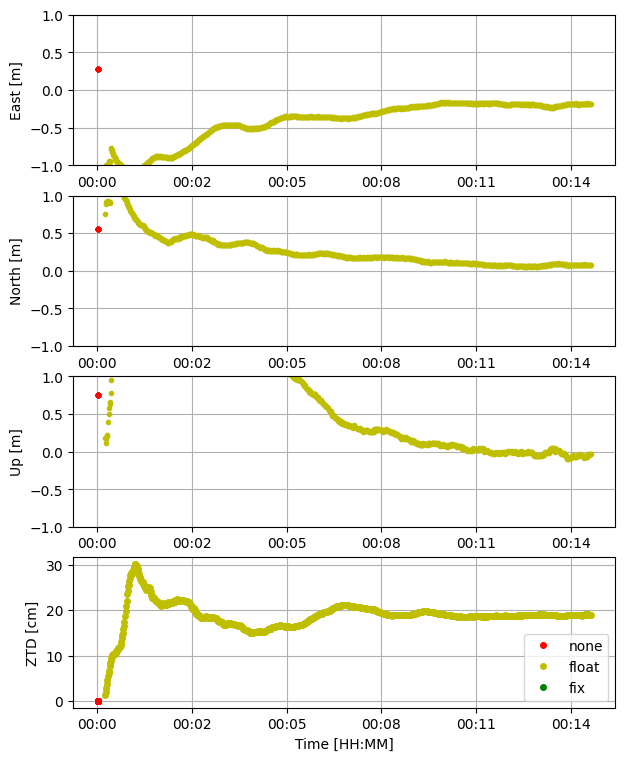

In [91]:
ylim = 1.0

idx4 = np.where(smode == 4)[0]
idx5 = np.where(smode == 5)[0]
idx0 = np.where(smode == 0)[0]

fig = plt.figure(figsize=[7, 9])
fig.set_rasterized(True)
lbl_t = ['East [m]', 'North [m]', 'Up [m]']
fmt = '%H:%M'

for k in range(3):
    plt.subplot(4, 1, k+1)
    plt.plot(t[idx0], enu[idx0, k], 'r.')
    plt.plot(t[idx5], enu[idx5, k], 'y.')
    plt.plot(t[idx4], enu[idx4, k], 'g.')

    plt.ylabel(lbl_t[k])
    plt.grid()
    plt.ylim([-ylim, ylim])
    plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))

plt.subplot(4, 1, 4)
plt.plot(t[idx0], ztd[idx0]*1e2, 'r.', markersize=8, label='none')
plt.plot(t[idx5], ztd[idx5]*1e2, 'y.', markersize=8, label='float')
plt.plot(t[idx4], ztd[idx4]*1e2, 'g.', markersize=8, label='fix')
plt.ylabel('ZTD [cm]')
plt.grid()
plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))

plt.xlabel('Time [HH:MM]')
plt.legend()


## Example 10: PPP positioning (PPP via SouthPAN)

This section demonstrates PPP positioning using PPP via SouthPAN (PVS) corrections with a Septentrio mosaic-X5 receiver.

In [40]:
from copy import deepcopy
import matplotlib.pyplot as plt
import numpy as np
from binascii import unhexlify
from sys import stdout

import cssrlib.gnss as gn
from cssrlib.gnss import ecef2pos, Nav
from cssrlib.gnss import time2gpst, time2doy, time2str, timediff, epoch2time
from cssrlib.gnss import rSigRnx
from cssrlib.gnss import sys2str
from cssrlib.peph import atxdec, searchpcv
from cssrlib.cssr_pvs import cssr_pvs
from cssrlib.pppssr import pppos
from cssrlib.rinex import rnxdec

In [49]:
# Start epoch and number of epochs
ep = [2025, 8, 21, 7, 0, 0]

time = epoch2time(ep)
year = ep[0]
doy = int(time2doy(time))

let = chr(ord('a')+ep[3])
bdir = f'cssrlib-data/data/doy{ep[0]:04d}-{doy:03d}/'
navfile = bdir+f'{doy:03d}{let}_rnx.nav'
obsfile = bdir+f'{doy:03d}{let}_rnx.obs'
atxfile = bdir+'../antex/igs20.atx'

# Specify SBAS corrections files
file_sbas = bdir+f'{doy:03d}{let}_sbas.txt'
prn_ref = 122  # satellite PRN for PRN122
sbas_type = 1  # L1: 0, L5: 1

dtype = [('wn', 'int'), ('tow', 'float'), ('prn', 'int'),
         ('type', 'int'), ('marker', 'S2'), ('nav', 'S124')]

# Set user reference position
xyz_ref = [-3962108.6836, 3381309.5672, 3668678.6720]
pos_ref = ecef2pos(xyz_ref)

# Define signals to be processed
sigs = [rSigRnx("GC1C"), rSigRnx("GC5Q"),
        rSigRnx("GL1C"), rSigRnx("GL5Q"),
        rSigRnx("GS1C"), rSigRnx("GS5Q"),
        rSigRnx("EC1C"), rSigRnx("EC5Q"),
        rSigRnx("EL1C"), rSigRnx("EL5Q"),
        rSigRnx("ES1C"), rSigRnx("ES5Q")]


In [50]:
rnx = rnxdec()
rnx.setSignals(sigs)

nav = Nav()
nav.pmode = 0 # Positioning mode: 0:static, 1:kinematic

# Decode RINEX NAV data
nav = rnx.decode_nav(navfile, nav)

# Load PPP corrections
v = np.genfromtxt(file_sbas, dtype=dtype)

cs = cssr_pvs()
cs.monlevel = 0

# Load ANTEX data for satellites and stations
atx = atxdec()
atx.readpcv(atxfile)

nav.monlevel = 0  # Logging level

# Load RINEX OBS file header
if rnx.decode_obsh(obsfile) >= 0:

    # Auto-substitute signals
    rnx.autoSubstituteSignals()

    # Initialize position
    rr = rnx.pos
    pos = ecef2pos(rr)
    ppp = pppos(nav, rnx.pos, 'test_ppppvs.log')
    nav.elmin = np.deg2rad(5.0)
    nav.glo_ch = rnx.glo_ch

    # Set PCO/PCV information
    nav.sat_ant = atx.pcvs
    nav.rcv_ant = searchpcv(atx.pcvr, rnx.ant,  rnx.ts)

In [46]:
print("Available signals")
for sys, sigs in rnx.sig_map.items():
  txt = "{:7s} {}".format(sys2str(sys),
        ' '.join([sig.str() for sig in sigs.values()]))
  print(txt)

print("\nSelected signals")
for sys, tmp in rnx.sig_tab.items():
  txt = "{:7s} ".format(sys2str(sys))
  for _, sigs in tmp.items():
    txt += "{} ".format(' '.join([sig.str() for sig in sigs]))
  print(txt)

Available signals
GPS     C1C L1C D1C S1C C2W L2W D2W S2W C2L L2L D2L S2L C5Q L5Q D5Q S5Q
GLONASS C1C L1C D1C S1C C2C L2C D2C S2C C2P L2P D2P S2P C3Q L3Q D3Q S3Q
GALILEO C1C L1C D1C S1C C5Q L5Q D5Q S5Q C7Q L7Q D7Q S7Q C8Q L8Q D8Q S8Q C6C L6C D6C S6C
BEIDOU  C1P L1P D1P S1P C2I L2I D2I S2I C5P L5P D5P S5P C6I L6I D6I S6I C7D L7D D7D S7D C7I L7I D7I S7I
QZSS    C1C L1C D1C S1C C1E L1E D1E S1E C1L L1L D1L S1L C2L L2L D2L S2L C5Q L5Q D5Q S5Q
IRNSS   C1P L1P D1P S1P C5A L5A D5A S5A

Selected signals
GPS     C1C C5Q L1C L5Q S1C S5Q 
GALILEO C1C C5Q L1C L5Q S1C S5Q 


In [ ]:
nep = 15 * 60  # increase this to run longer

# Intialize data structures for results
t = np.zeros(nep)
enu = np.ones((nep, 3))*np.nan
sol = np.zeros((nep, 4))
ztd = np.zeros((nep, 1))
smode = np.zeros(nep, dtype=int)

# Skip epochs until start time
obs = rnx.decode_obs()
while time > obs.t and obs.t.time != 0:
    obs = rnx.decode_obs()

# Loop over number of epoch from file start
for ne in range(nep):
    week, tow = time2gpst(obs.t)
    cs.week = week
    cs.tow0 = tow//86400*86400
    cs.time0 = obs.t

    # Set initial epoch
    if ne == 0:
        nav.t = deepcopy(obs.t)
        t0 = deepcopy(obs.t)
        t0.time = t0.time//30*30
        nav.time_p = t0

    vi = v[(v['tow'] == tow) & (v['prn'] == prn_ref)
           & (v['type'] > 30)]
    if len(vi) > 0:
      msg = unhexlify(vi['nav'][0])
      cs.decode_cssr(msg, 0)

    cs.check_validity(obs.t)

    # Call PPP module
    if (cs.lc[0].cstat & 0x6) == 0x6:
        ppp.process(obs, cs=cs)

    # Save output
    t[ne] = timediff(nav.t, t0) / 86400.0
    sol = nav.xa[0:3] if nav.smode == 4 else nav.x[0:3]
    enu[ne, :] = gn.ecef2enu(pos_ref, sol-xyz_ref)
    ztd[ne] = nav.xa[ppp.IT(nav.na)] if nav.smode == 4 else nav.x[ppp.IT(nav.na)]
    smode[ne] = nav.smode

    # Log to standard output
    stdout.write('\r {} ENU {:7.3f} {:7.3f} {:7.3f}, 2D {:6.3f}, mode {:1d}'
                 .format(time2str(obs.t),
                         enu[ne, 0], enu[ne, 1], enu[ne, 2],
                         np.sqrt(enu[ne, 0]**2+enu[ne, 1]**2),
                         smode[ne]))

    # Get new epoch, exit after last epoch
    obs = rnx.decode_obs()
    if obs.t.time == 0:
        break

 too few satellites < 6: nsat=0
 2025-08-21 07:00:01 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few satellites < 6: nsat=1
 2025-08-21 07:00:02 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few satellites < 6: nsat=1
 2025-08-21 07:00:03 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few satellites < 6: nsat=1
 2025-08-21 07:00:04 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few satellites < 6: nsat=2
 2025-08-21 07:00:05 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few satellites < 6: nsat=3
 2025-08-21 07:00:06 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few satellites < 6: nsat=3
 2025-08-21 07:00:07 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few satellites < 6: nsat=3
 2025-08-21 07:00:08 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few satellites < 6: nsat=3
 2025-08-21 07:00:09 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few satellites < 6: nsat=4
 2025-08-21 07:00:10 ENU   0.280   0.554   0.748, 2D  0.621, mode 0 too few s

In [ ]:
ylim = 1.0

idx4 = np.where(smode == 4)[0]
idx5 = np.where(smode == 5)[0]
idx0 = np.where(smode == 0)[0]

fig = plt.figure(figsize=[7, 9])
fig.set_rasterized(True)
lbl_t = ['East [m]', 'North [m]', 'Up [m]']
fmt = '%H:%M'

for k in range(3):
    plt.subplot(4, 1, k+1)
    plt.plot(t[idx0], enu[idx0, k], 'r.')
    plt.plot(t[idx5], enu[idx5, k], 'y.')
    plt.plot(t[idx4], enu[idx4, k], 'g.')

    plt.ylabel(lbl_t[k])
    plt.grid()
    plt.ylim([-ylim, ylim])
    plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))

plt.subplot(4, 1, 4)
plt.plot(t[idx0], ztd[idx0]*1e2, 'r.', markersize=8, label='none')
plt.plot(t[idx5], ztd[idx5]*1e2, 'y.', markersize=8, label='float')
plt.plot(t[idx4], ztd[idx4]*1e2, 'g.', markersize=8, label='fix')
plt.ylabel('ZTD [cm]')
plt.grid()
plt.gca().xaxis.set_major_formatter(md.DateFormatter(fmt))

plt.xlabel('Time [HH:MM]')
plt.legend()


## Reference

- [1] T. Takasu, “RTKLIB: Open Source Program Package for RTK-GPS,” FOSS4G 2009 Tokyo, Japan, 2009.
-  Hirokawa, R., Hauschild, A., Everett, T. (2023). Python Toolkit for Open PPP/PPP-RTK Services. In *Proceedings of the 35th International Technical Meeting of the Satellite Division of The Institute of Navigation (ION GNSS+ 2023)*